# Málaga Airbnb Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In this notebook, I'll follow the CRISP-DM process to analyze Málaga Airbnb homes data and answer the following questions:
- What is the perfect time of year to visit Málaga city ?
- Which neighborhood is more affordable and less crowding ?
- Which features is more involved in predicting price ?   


by separating the notebook into 3 parts and show you the details that drive me to the answers

## Part 1:
<h2>What is the perfect time of year to visit Málaga city ?</h2>

### 1.Gather

In [2]:
calendar_df=pd.read_csv("data/calendar.zip",compression='zip') #Loading calendar data

### 2.Assess

In [3]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334175 entries, 0 to 2334174
Data columns (total 7 columns):
listing_id        int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights    int64
maximum_nights    int64
dtypes: int64(3), object(4)
memory usage: 124.7+ MB


In [4]:
calendar_df.describe()

,listing_id,minimum_nights,maximum_nights
count,2.334175e+06,2.334175e+06,2.334175e+06
mean,2.637861e+07,4.369014e+00,8.335845e+02
std,1.122482e+07,2.753960e+01,4.675077e+02
min,9.603300e+04,1.000000e+00,1.000000e+00
25%,1.837136e+07,2.000000e+00,3.000000e+02
50%,2.708001e+07,2.000000e+00,1.125000e+03
75%,3.601766e+07,3.000000e+00,1.125000e+03
max,4.262131e+07,1.125000e+03,1.127000e+03


In [5]:
calendar_df.isna().sum()

listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64

In [6]:
calendar_df.duplicated().sum()

0

### 3.Clean & Analyize

In [7]:
#remove '$' and ',' from price and cast it to float
calendar_df.price=calendar_df.price.apply(lambda x:x[1:].replace(',','')).astype(float)
calendar_df['price'].sample(5)

1400239     37.0
190766     110.0
2329582    140.0
1494507     49.0
1057573     30.0
Name: price, dtype: float64

In [8]:
#change 'date' column type from 'str' to 'datetime'
calendar_df['date']=pd.to_datetime(calendar_df['date'])
calendar_df['date'].sample(5)

571584    2020-11-12
2130098   2021-01-08
1583380   2020-03-10
625901    2020-07-20
2006997   2020-10-13
Name: date, dtype: datetime64[ns]

### 4.Model and Visualize

In [9]:
# Create new columns to split date to year, month, and day
calendar_df['year'] = calendar_df['date'].dt.year
calendar_df['month'] = calendar_df['date'].dt.month
calendar_df['day'] = calendar_df['date'].dt.day

In [10]:
calendar_df.sample(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,year,month,day
2258682,42087380,2020-12-16,t,103.0,$103.00,2,1125,2020,12,16
2020939,39549914,2020-12-01,f,45.0,$41.00,2,22,2020,12,1
1573543,33299835,2020-07-09,f,175.0,$175.00,3,1125,2020,7,9


In [11]:
#check values of available column
calendar_df.available.value_counts()

t    1317120
f    1017055
Name: available, dtype: int64

In [12]:
#convert available value from t to 1 and f to 0
calendar_df.available=calendar_df.available.map({'t':1,'f':0})
calendar_df['available'].value_counts()

1    1317120
0    1017055
Name: available, dtype: int64

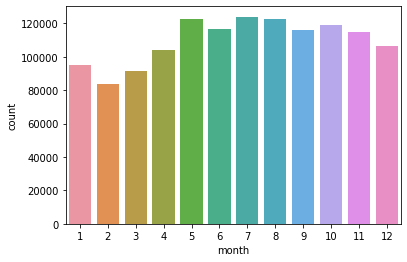

In [13]:
# check availability for each month
sns.countplot(x='month',data=calendar_df[calendar_df.available==1]);

In [14]:
month_availability=calendar_df.groupby(['month'])['available'].mean().sort_values(ascending=False)
month_availability

month
7     0.625312
8     0.619622
5     0.618306
6     0.608314
9     0.604154
10    0.599546
11    0.599364
4     0.541089
12    0.538036
1     0.480592
2     0.468323
3     0.462463
Name: available, dtype: float64

In [15]:
#some stats about month_availability
month_availability.describe()

count    12.000000
mean      0.563760
std       0.062893
min       0.462463
25%       0.523675
50%       0.599455
75%       0.610812
max       0.625312
Name: available, dtype: float64

In [16]:
# I'll consider months with the average amount of available present over 0.61 to be active (above 75% of data)
active_months_val=month_availability[month_availability>0.61]
active_months=active_months_val.index.tolist()
active_months

[7, 8, 5]

In [17]:
# and I'll consider months with the average amount of available present under 0.52 to be inactive (below 25% of data)
inactive_months_val=month_availability[month_availability<0.523]

# Get names of active months
inactive_months=inactive_months_val.index.tolist()
inactive_months

[1, 2, 3]

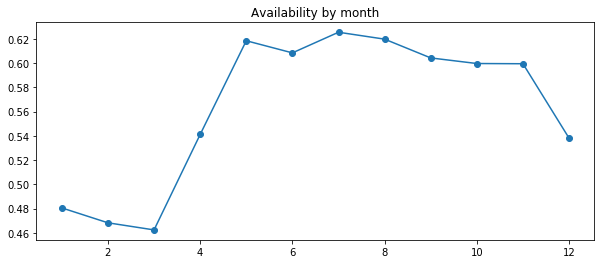

In [18]:
#Plot Availability by month
plt.figure(figsize=(10,4))
plt.plot(month_availability.sort_index(), 'o-')
plt.title('Availability by month')
plt.show()

- Based on the above graph:
    - May, July, and August are the most available time of the year to visit Malaga city.
    - January, February and March are the least.

But what about days let's try to explore it

#### I. Active Days

In [19]:
# Separate the active months in another dataframe
active_months_df=calendar_df[calendar_df['month'].isin(active_months)] 

# Count of availability for each day
active_months_available_days=active_months_df.groupby(['day'])['available'].mean().sort_values(ascending=False)
active_months_available_days

day
27    0.659004
26    0.658952
25    0.652906
24    0.646547
12    0.636800
28    0.635757
13    0.632317
31    0.632004
23    0.631691
29    0.629346
6     0.627834
19    0.626792
5     0.625801
11    0.625593
10    0.622361
30    0.620485
7     0.619442
20    0.619077
18    0.618921
4     0.617670
3     0.612510
9     0.611780
21    0.611311
17    0.609747
22    0.608392
8     0.608288
14    0.605108
16    0.589888
2     0.589523
1     0.584780
15    0.582851
Name: available, dtype: float64

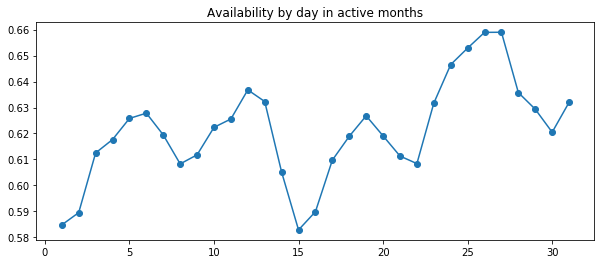

In [20]:
#Plot Availability by Day in active months
plt.figure(figsize=(10,4))
plt.plot(active_months_available_days.sort_index(), 'o-')
plt.title('Availability by day in active months')
plt.show()

#### II. Inactive Days

In [21]:
# Separate the inactive months in another dataframe
inactive_months_df=calendar_df[calendar_df['month'].isin(inactive_months)] 

# Count of availability for each day
inactive_months_available_days=inactive_months_df.groupby(['day'])['available'].mean().sort_values(ascending=False)
inactive_months_available_days

day
31    0.526349
30    0.517748
29    0.505395
24    0.499661
25    0.496846
23    0.495856
17    0.489653
26    0.489601
10    0.488350
11    0.487360
16    0.487047
18    0.486943
22    0.484076
9     0.479698
12    0.478603
3     0.477821
15    0.475632
4     0.474642
19    0.469690
27    0.468491
2     0.465676
28    0.462236
8     0.461089
13    0.453896
5     0.449518
14    0.444775
20    0.443002
21    0.435653
6     0.420172
7     0.409591
1     0.407349
Name: available, dtype: float64

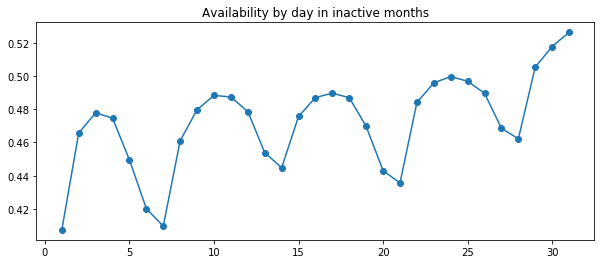

In [22]:
#Plot Availability by Day in inactive months
plt.figure(figsize=(10,4))
plt.plot(inactive_months_available_days.sort_index(), 'o-')
plt.title('Availability by day in inactive months')
plt.show()

All the above exploring was about availability but what about price let's take it a look

In [23]:
# Average price per months
month_price=calendar_df.groupby(['month'])['price'].mean().sort_values(ascending=False)
month_price

month
2     407.867346
1     382.065429
12    164.219108
9     156.181324
10    150.027264
11    147.509950
8     146.121547
7     124.526354
6     110.661704
4     108.988527
5     101.945477
3      89.849106
Name: price, dtype: float64

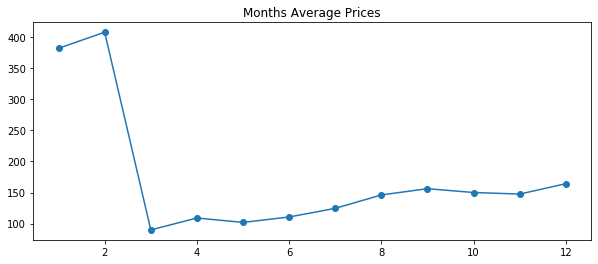

In [24]:
plt.figure(figsize=(10,4))
plt.title('Months Average Prices')
plt.plot(month_price.sort_index(), 'o-');

In [25]:
# Get statistical information
month_price.describe()

count     12.000000
mean     174.163595
std      105.920524
min       89.849106
25%      110.243410
50%      146.815749
75%      158.190770
max      407.867346
Name: price, dtype: float64

In [26]:
# Consider months with avergae price over 158 to be expensive (above 75% of data)
high_price_months=month_price[month_price>158]

# Get names of high price months
expensive_months=high_price_months.index.tolist()
expensive_months

[2, 1, 12]

In [27]:
# Consider months with avergae price over 110 to be expensive (less 25% of data)
low_price_months=month_price[month_price<110]

# Get names of high price months
cheap_months=low_price_months.index.tolist()
cheap_months

[4, 5, 3]

- Based on the above analyzing:
    - Prices increase in Winter season, mostly in December, January and February
    - Prices decrease in Spring season in March, April and May
    
So we can apply some rules to get the best time to visit Malaga:

In [38]:
# Get active and expensive months
print("Active and expensive months :",list(set(expensive_months) & set(active_months)))
# Get inactive and expensive months
print("Inactive and expensive months :",list(set(expensive_months) & set(inactive_months)))
# Get active and cheap months
print("Active and cheap months :",list(set(cheap_months) & set(active_months)))
# Get inactive and cheap months
print("Inactive and cheap months :",list(set(cheap_months) & set(inactive_months)))

Active and expensive months : []
Inactive and expensive months : [1, 2]
Active and cheap months : [5]
Inactive and cheap months : [3]


#### In Conclusion
"March is the less crowded and most affordable time in year to visit Malaga"